In [1]:
import numpy as np

# Sample data matrix (m samples, n features)
X = np.array([[0.96, 1.72, 1.92], [1.72, 0.96, 3.55], [1.92, 3.55, 3.84]])

# Step 1: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by descending eigenvalues
idx = np.argsort(eigenvalues)[::-1]
principal_components = eigenvectors[:, idx]

print("Principal Components:\n", principal_components)

Principal Components:
 [[-0.25952897  0.34437059 -0.90224919]
 [-0.82462689 -0.56527024  0.02144876]
 [-0.5026283   0.74958552  0.43068125]]


In [2]:
print("eigenvalues:", eigenvalues)

eigenvalues: [ 2.16885010e+00 -2.53323646e-17  9.31349903e-01]


Explained variance by principal components: [0.72620033 0.23147407 0.03711516 0.00521044]


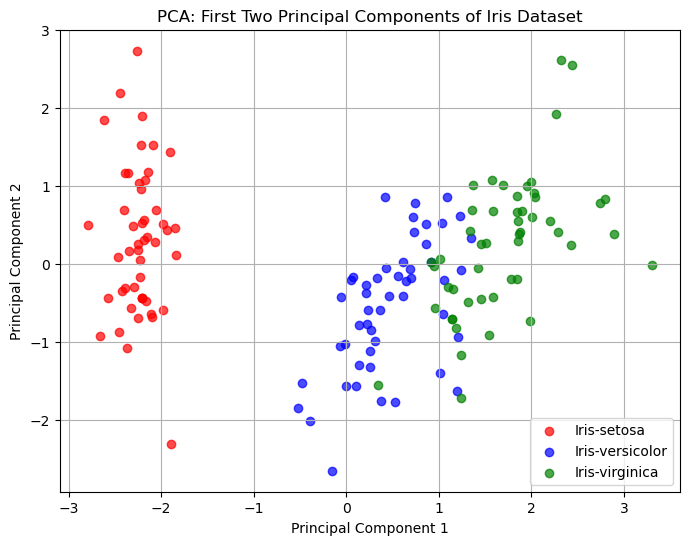

Frobenius norm for rank 1 approximation: 7.533732680851174
Frobenius norm for rank 2 approximation: 4.616128580531053


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
file_path = "iris.csv"  # Adjust the path if needed
iris_data = pd.read_csv(file_path)

# Rename columns correctly
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data.columns = column_names

# Extract numerical features
features = iris_data.drop(columns=["species"])

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Compute PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(4)])
pca_df["species"] = iris_data["species"]

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by principal components:", explained_variance)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

for species, color in species_colors.items():
    subset = pca_df[pca_df["species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], label=species, color=color, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()

# Compute rank 1 and rank 2 approximations
rank_1_approx = np.outer(principal_components[:, 0], pca.components_[0]) 
rank_2_approx = rank_1_approx + np.outer(principal_components[:, 1], pca.components_[1])

# Re-scale back to original feature space
rank_1_approx_rescaled = scaler.inverse_transform(rank_1_approx)
rank_2_approx_rescaled = scaler.inverse_transform(rank_2_approx)

# Compute Frobenius norms to measure closeness
original_matrix = scaler.inverse_transform(features_scaled)

norm_rank_1 = np.linalg.norm(original_matrix - rank_1_approx_rescaled, 'fro')
norm_rank_2 = np.linalg.norm(original_matrix - rank_2_approx_rescaled, 'fro')

print(f"Frobenius norm for rank 1 approximation: {norm_rank_1}")
print(f"Frobenius norm for rank 2 approximation: {norm_rank_2}")

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)

# Map species names to numerical labels
species_labels = iris_data["species"].astype("category").cat.codes

# Compute clustering accuracy using Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(species_labels, clusters)

# Display the clustering accuracy
print(f"ARI Score: {ari_score}")

ARI Score: 0.6150051194844962


In [6]:
import numpy as np

X = np.array([[0.96, 1.72, 1.92],
              [2.28, 0.96, 4.56]])

cov_matrix = np.cov(X, bias=False)  # bias=False uses (n-1) in the denominator
print(cov_matrix)

[[0.25653333 0.3176    ]
 [0.3176     3.3168    ]]
